<a href="https://colab.research.google.com/github/MALLI7622/Machine-Learning-Algorithms/blob/master/KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import KMeans
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


In [3]:
company_descriptions = pd.read_excel('Company Descriptions.xlsx')

In [4]:
for i, desc in enumerate(company_descriptions['company_description']):
    if type(desc) == float:
        company_descriptions['company_description'][i] = company_descriptions['company_short_description'][i]
        

In [5]:
company_descriptions.head()

,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


In [6]:
company_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   company_name               19965 non-null  object
 1   company_short_description  19965 non-null  object
 2   company_description        19965 non-null  object
dtypes: object(3)
memory usage: 468.1+ KB


In [7]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]

In [8]:
company_descriptions['company_description']

0        Codementor provides live 1:1 help for software...
1        AgShift solution blends Deep Learning with Com...
2        Shipsi empowers any retailer with the ability ...
3        We're helping a global network of developers, ...
4        Biobot Analytics analyzes sewage to estimate o...
                               ...                        
19960    Powermat Technologies is a developer of wirele...
19961    Properly is a visual checklist tool that lets ...
19962    Bid Ops accelerates business partnerships betw...
19963    Tavolo offers an online store that enables its...
19964    StackMob’s mobile platform helps developers cr...
Name: company_description, Length: 19965, dtype: object

In [9]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer


In [10]:
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

In [11]:
desc = company_descriptions['company_description'].values

In [12]:
vectorizer = TfidfVectorizer(stop_words = stop_words)

In [13]:
X = vectorizer.fit_transform(desc)

In [14]:
word_features = vectorizer.get_feature_names()

In [15]:
print(len(word_features))

55613


In [16]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')


In [18]:
def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]


In [19]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)

In [20]:
X2 = vectorizer2.fit_transform(desc)

In [21]:
word_features2 = vectorizer2.get_feature_names()

In [22]:
print(len(word_features2))

41652


In [23]:
print(word_features2[:50]) 

["'n", "'s", 'aa', 'aaa', 'aabb', 'aac', 'aadi', 'aaf', 'aafco', 'aaid', 'aajtak', 'aao', 'aaptiv', 'aar', 'aarden', 'aardvark', 'aarjav', 'aarki', 'aarkimobil', 'aarohi', 'aaron', 'aarp', 'aasm', 'aat', 'aati', 'aav', 'aavhsc', 'aavogen', 'ab', 'aba', 'abacus', 'abalon', 'abandon', 'abaqus', 'abat', 'abazab', 'abb', 'abbatron', 'abbi', 'abbotsford', 'abbott', 'abbrevi', 'abbvi', 'abc', 'abcnew', 'abdelkad', 'abdomen', 'abdomin', 'abdominoplasti', 'abdus']


In [24]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

41652
["'n", "'s", 'aa', 'aaa', 'aabb', 'aac', 'aadi', 'aaf', 'aafco', 'aaid', 'aajtak', 'aao', 'aaptiv', 'aar', 'aarden', 'aardvark', 'aarjav', 'aarki', 'aarkimobil', 'aarohi', 'aaron', 'aarp', 'aasm', 'aat', 'aati', 'aav', 'aavhsc', 'aavogen', 'ab', 'aba', 'abacus', 'abalon', 'abandon', 'abaqus', 'abat', 'abazab', 'abb', 'abbatron', 'abbi', 'abbotsford', 'abbott', 'abbrevi', 'abbvi', 'abc', 'abcnew', 'abdelkad', 'abdomen', 'abdomin', 'abdominoplasti', 'abdus']


In [26]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 100)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [35]:
%%time
from tqdm import tqdm
from sklearn.cluster import KMeans
sum_of_squared_distances = []
for i in range(1, 41):
    kmeans_1 = KMeans(n_clusters = i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans_1.fit(X3)
    sum_of_squared_distances.append(kmeans_1.inertia_)

CPU times: user 1h 8min 54s, sys: 2.78 s, total: 1h 8min 57s
Wall time: 1h 8min 59s


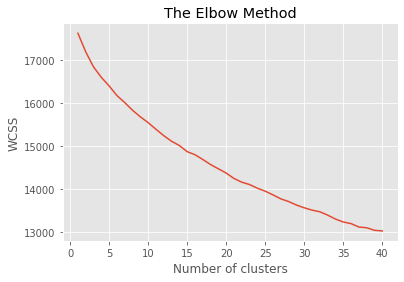

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(1,41),sum_of_squared_distances)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [41]:
%%time
from tqdm import tqdm
from sklearn.cluster import KMeans
sum_of_squared_distances = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    sum_of_squared_distances.append(kmeans.inertia_)
    if (i+1) % 10 == 0:
      print(i, "Iterations are completed")

9 Iterations are completed
19 Iterations are completed
29 Iterations are completed
39 Iterations are completed
49 Iterations are completed
59 Iterations are completed
69 Iterations are completed
79 Iterations are completed
89 Iterations are completed
99 Iterations are completed
CPU times: user 2h 45min 31s, sys: 11.1 s, total: 2h 45min 42s
Wall time: 2h 45min 46s


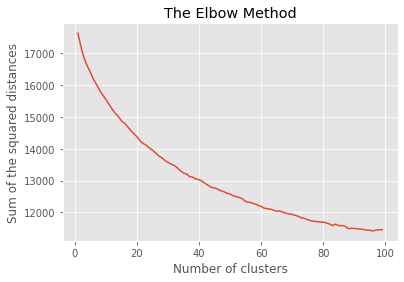

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(range(1,100),sum_of_squared_distances)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of the squared distances')
plt.savefig('elbow1.png')
plt.show()